In [49]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.metrics import accuracy_score

data = pd.read_csv('Bacteria_Gene_Quantified.csv')
gene_data = data.drop('Bacteria',axis=1)
# Toxin-antitoxin gene corresponds to a gene that creates a toxin and an antitoxin
gene_data["Toxin"] = gene_data["Toxin"] + gene_data["Toxin-antitoxin"]
gene_data["Antitoxin"] = gene_data["Antitoxin"] + gene_data["Toxin-antitoxin"]


#To verify if a category is made up of mostly core genes coefficient of variation is used
std_all = gene_data.std()
var_coefficient = gene_data.std() / gene_data.mean()
core_genes = var_coefficient < 0.08

#Force Toxin-antitoxin removal
core_genes["Toxin-antitoxin"] = True

bacteria = gene_data.loc[:, ~core_genes]

data2 = pd.read_csv('Phages.csv')
data2.head()

gene_data = bacteria.iloc[:,2:]
gene_data["Number of Phages"] = data2["fagos"]
print(gene_data)

    Drug  Repressor  Antitoxin  Toxin  Adhesin  Hemolysin   Flagellar  \
0     32         35         18     20        3           2         30   
1     40         39         12     25        7           4         30   
2     41         39         15     20        5           8         30   
3     32         32         11     14        4           3         17   
4     31         33         18     20        2           2         30   
5     39         41         10     19        5           1         30   
6     34         36         17     19        3           5         30   
7     31         35         14     14        4           3         30   
8     38         37         12     15        7           2         31   
9     31         39         14     12        4           3         30   
10    32         33         15     17        4           3         46   
11    37         32         11     14        4           2         30   
12    32         36         13     13        4     

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

y = gene_data['Number of Phages']
X = gene_data.drop(['Number of Phages'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 23)

regressor = DecisionTreeRegressor(random_state=42)

# Example: For classification
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator = regressor, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: -1.6617579168012395


In [53]:
model = DecisionTreeRegressor(max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)

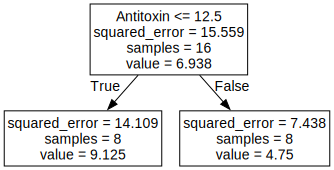

In [55]:
export_graphviz(model, 
                out_file = "bacteria_tree.dot", 
                feature_names = X_train.columns)

with open("bacteria_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error = ' + str(mse))
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error = 21.576171875
R-squared (R²): -0.2797729379054681
